<div style="background-color:#4F959D; padding:15px; border-radius:5px">
    
# 1. Project Overview - Part I
</div>

<div style="background-color:#E8E0D1; padding:15px; border-radius:5px">
    
## Telecom Customer Churn Prediction - Part I

**Project Overview**
This is **Part 1** of the **Telecom Customer Churn Prediction** project, where we explore and analyze a dataset of telecom customers to understand the key factors contributing to churn. The dataset, sourced from **[Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)**, includes **demographic, service usage, and contract-related variables** that help predict whether a customer will leave the telecom provider.

**Objective**
- Analyze customer behavior and identify churn patterns.
- Perform **Exploratory Data Analysis (EDA)** to uncover trends and correlations.
- Process and transform categorical variables for modeling.
- Prepare the dataset for **machine learning modeling** in Part 2.

**Scope of Part 1**
This phase of the project **focuses on data exploration and preprocessing**, covering:

1️⃣ **Project Introduction** → Defining objectives and business context.  
2️⃣ **Dataset Acquisition & Structure** → Understanding feature descriptions and data types.  
3️⃣ **Exploratory Data Analysis (EDA)** → Visualizing data distributions, feature correlations, and **churn impact analysis**.  
4️⃣ **Feature Engineering (Initial Phase)** → Handling missing values, encoding categorical data, and detecting outliers.  

**What Will Be Added in Part 2?**
- **Feature Selection** → Identifying key predictors for churn.  
- **Machine Learning Modeling** → Training and evaluating classifiers (e.g., Logistic Regression, Random Forest, XGBoost).  
- **Hyperparameter Tuning** → Optimizing model performance.  
- **Deployment (Optional)** → Creating an interactive dashboard or API for predictions.  

**Technologies & Tools Used**
- **Programming:** Python (Pandas, NumPy, Scikit-learn)  
- **Data Visualization:** Matplotlib, Seaborn  
- **Feature Engineering:** One-Hot Encoding, Label Encoding, Standardization  

This structured approach ensures that **Part 1 lays the foundation for machine learning modeling** in the next phase.

🔗 **Related Projects**
In my **GitHub**, you can also find two related projects:
- 📌 **[Bank Customer Churn Prediction](https://github.com/gustavo-m-freitas/Bank-Churn)**
- 📌 **[Bankruptcy Prediction](https://github.com/gustavo-m-freitas/Bankruptcy-Prediction)**

These projects explore customer churn and financial risk prediction using **machine learning and data analysis**.

</div>

<div style="background-color:#4F959D; padding:15px; border-radius:5px">

# 2. Dataset Download & Loading
</div>

## 🔧 Setup  

For this project, we will be using the following Python libraries:  

- **pandas** → Data manipulation and analysis, essential for handling structured datasets.  
- **numpy** → Numerical computing, used for efficient mathematical operations.  
- **matplotlib** → Core visualization library for creating static plots and graphs.  
- **seaborn** → Statistical data visualization, used for creating enhanced plots and correlation analysis.  
- **sklearn.preprocessing (StandardScaler, LabelEncoder)** → Feature scaling techniques for normalizing and encoding categorical variables.  
- **sklearn.decomposition (PCA)** → Dimensionality reduction to extract key features from high-dimensional data.  
- **sklearn.ensemble (RandomForestClassifier)** → Machine learning model to evaluate feature importance and predict churn.  
- **sklearn.cluster (KMeans)** → Unsupervised machine learning algorithm used for clustering similar customers.  
- **plotly.express** → Library for interactive visualizations, simplifying the creation of dynamic charts.  
- **matplotlib.colors (to_hex)** → Converts RGB colors to HEX format for consistent styling across plots.  
- **missingno** → Library for visualizing and analyzing missing data in datasets.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import plotly.express as px
from matplotlib.colors import to_hex
import missingno as msno

## Downloading 

To begin this project, we first need to load the dataset. The dataset is stored in a CSV file and can be read using `pandas`. 

In [15]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.drop(['customerID'], axis=1, inplace=True)

# Move 'churn' to the first column
df = df[['Churn'] + [col for col in df.columns if col != 'Churn']]
df.rename(columns={'Churn': 'churn'}, inplace=True)

<div style="background-color:#4F959D; padding:15px; border-radius:5px">

# 3. Dataset Structure
</div>

In [5]:
# Check if data are numerical or categorical and if we have missing information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Project Features Description

Below is a list of the features used in this project, along with their descriptions:  

| **Feature**           | **Usage**             | **Description** |
|----------------------|----------------------|----------------|
| `customerID`        | ❌ Unused Variable    | Unique customer identifier (account number). |
| `gender`           | ✅ Input Feature      | Customer's gender (Male/Female). |
| `SeniorCitizen`    | ✅ Input Feature      | Whether the customer is a senior citizen (1 = Yes, 0 = No). |
| `Partner`         | ✅ Input Feature      | Whether the customer has a partner (Yes/No). |
| `Dependents`      | ✅ Input Feature      | Whether the customer has dependents (Yes/No). |
| `tenure`          | ✅ Input Feature      | Number of months the customer has stayed with the company. |
| `PhoneService`    | ✅ Input Feature      | Whether the customer has a phone service (Yes/No). |
| `MultipleLines`   | ✅ Input Feature      | Whether the customer has multiple lines (Yes/No/No phone service). |
| `InternetService` | ✅ Input Feature      | Customer’s internet service provider (DSL/Fiber optic/No). |
| `OnlineSecurity`  | ✅ Input Feature      | Whether the customer has online security (Yes/No/No internet service). |
| `OnlineBackup`    | ✅ Input Feature      | Whether the customer has online backup (Yes/No/No internet service). |
| `DeviceProtection`| ✅ Input Feature      | Whether the customer has device protection (Yes/No/No internet service). |
| `TechSupport`     | ✅ Input Feature      | Whether the customer has tech support (Yes/No/No internet service). |
| `StreamingTV`     | ✅ Input Feature      | Whether the customer has streaming TV service (Yes/No/No internet service). |
| `StreamingMovies` | ✅ Input Feature      | Whether the customer has streaming movies service (Yes/No/No internet service). |
| `Contract`        | ✅ Input Feature      | The contract term of the customer (Month-to-month/One year/Two years). |
| `PaperlessBilling`| ✅ Input Feature      | Whether the customer has paperless billing (Yes/No). |
| `PaymentMethod`   | ✅ Input Feature      | The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card). |
| `MonthlyCharges`  | ✅ Input Feature      | The amount charged to the customer monthly. |
| `TotalCharges`    | ✅ Input Feature      | The total amount charged to the customer. |
| `Churn`          | 🎯 Target Variable    | Whether the customer churned or not (Yes/No). |

**Note:** The `customerID` is not used in the modeling process as it does not provide relevant information for predicting churn.


<div style="background-color:#4F959D; padding:15px; border-radius:5px">

# 4. Data Cleaning and Preprocessing
</div>

In [18]:
# Checking Nan presence
[print(col) for col in df if df[col].isna().sum() > 0 ]

[]

In [20]:
# Check for duplicate rows in the dataset
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 22


## 4.1- Removing Duplicate Rows from the Dataset

In [23]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(f"Duplicated rows: {df.duplicated().sum()}")
df.info()

Duplicated rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7021 non-null   object 
 1   gender            7021 non-null   object 
 2   SeniorCitizen     7021 non-null   int64  
 3   Partner           7021 non-null   object 
 4   Dependents        7021 non-null   object 
 5   tenure            7021 non-null   int64  
 6   PhoneService      7021 non-null   object 
 7   MultipleLines     7021 non-null   object 
 8   InternetService   7021 non-null   object 
 9   OnlineSecurity    7021 non-null   object 
 10  OnlineBackup      7021 non-null   object 
 11  DeviceProtection  7021 non-null   object 
 12  TechSupport       7021 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7021 non-null   object 
 15  Contract          7021 non-null   object 
 16  PaperlessBilling  7021 

## 4.2- Convert "TotalCharges" to Numeric Format

In [25]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

## 4.3- Checking for Missing Values in the Dataset

<Axes: >

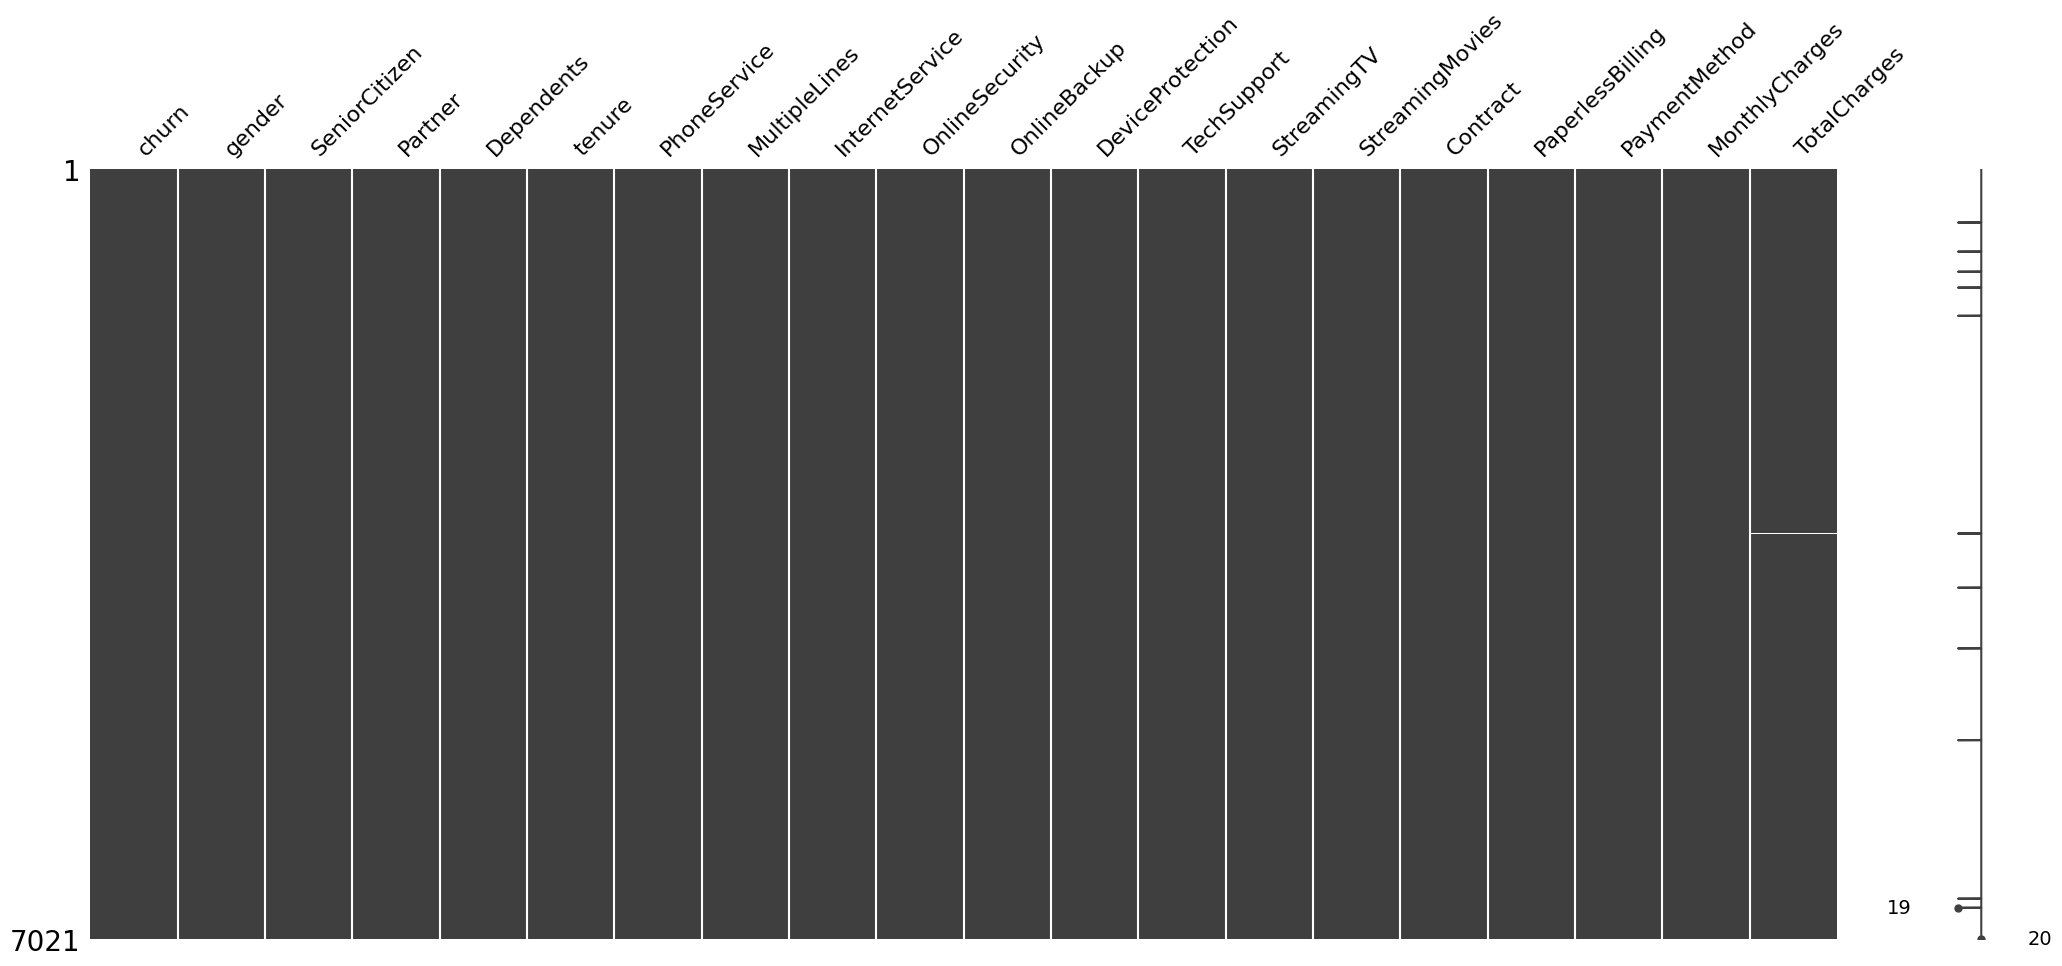

In [27]:
msno.matrix(df)

In [29]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

TotalCharges    11
dtype: int64

### 4.3.1- Filtering Rows with Missing Values in "TotalCharges"

In [33]:
df[df['TotalCharges'].isna()][['TotalCharges', 'MonthlyCharges', 'tenure']]

,TotalCharges,MonthlyCharges,tenure
488,NaN,52.55,0
753,NaN,20.25,0
936,NaN,80.85,0
1081,NaN,25.75,0
1338,NaN,56.05,0
3323,NaN,19.85,0
3817,NaN,25.35,0
4370,NaN,20.00,0
5207,NaN,19.70,0
6652,NaN,73.35,0


### 4.3.2- Handling Missing Values in `TotalCharges`

After converting the `TotalCharges` column to numeric format, we observed that there are **11 missing values** in this column. Upon further inspection, all missing values correspond to customers with `tenure = 0`, meaning they are new customers who have **not yet been billed**. Since these customers **do not have any historical charges**, the missing values were logically replaced with `0`.  

In [35]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [37]:
df[df['TotalCharges']==0][['TotalCharges', 'MonthlyCharges', 'tenure']]

,TotalCharges,MonthlyCharges,tenure
488,0.0,52.55,0
753,0.0,20.25,0
936,0.0,80.85,0
1081,0.0,25.75,0
1338,0.0,56.05,0
3323,0.0,19.85,0
3817,0.0,25.35,0
4370,0.0,20.00,0
5207,0.0,19.70,0
6652,0.0,73.35,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7021 non-null   object 
 1   gender            7021 non-null   object 
 2   SeniorCitizen     7021 non-null   int64  
 3   Partner           7021 non-null   object 
 4   Dependents        7021 non-null   object 
 5   tenure            7021 non-null   int64  
 6   PhoneService      7021 non-null   object 
 7   MultipleLines     7021 non-null   object 
 8   InternetService   7021 non-null   object 
 9   OnlineSecurity    7021 non-null   object 
 10  OnlineBackup      7021 non-null   object 
 11  DeviceProtection  7021 non-null   object 
 12  TechSupport       7021 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7021 non-null   object 
 15  Contract          7021 non-null   object 
 16  PaperlessBilling  7021 non-null   object 


<div style="background-color:#4F959D; padding:15px; border-radius:5px">

# 5- Exploratory Data Analysis (EDA) 
</div>

## 5.1- Target Variable Analysis - Churn

In [45]:
# Count the number of chrun (1) and non-chrun (0) companies
print(df['churn'].value_counts())
print('-'* 30)
print( f"Churn ratio: {round(len(df[df["churn"] == "Yes"]) / len(df["churn"])*100,1)}%" )  # Chrun ratio

churn
No     5164
Yes    1857
Name: count, dtype: int64
------------------------------
Churn ratio: 26.4%


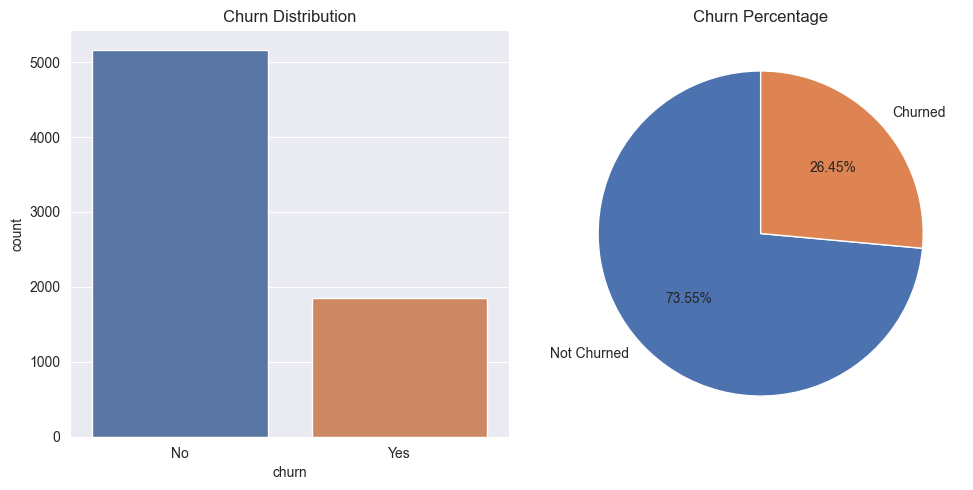

In [47]:
# Create figure and axes
sns.set_style("darkgrid") 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
palette = sns.color_palette("deep")  # "deep" is the default palette for Seaborn
churn_colors = [to_hex(palette[0]), to_hex(palette[1])]

# Countplot for churn distribution
sns.countplot(x="churn", data=df, hue="churn", legend=False, ax=axes[0],  palette=churn_colors)
axes[0].set_title("Churn Distribution")

# Pie chart for churn distribution
sizes = df["churn"].value_counts()
labels = ["Not Churned", "Churned"]

axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=churn_colors)
axes[1].set_title("Churn Percentage")

# Show the plots
plt.tight_layout()
plt.show()

### 5.2- Analysis with respect to Churn - Histograms

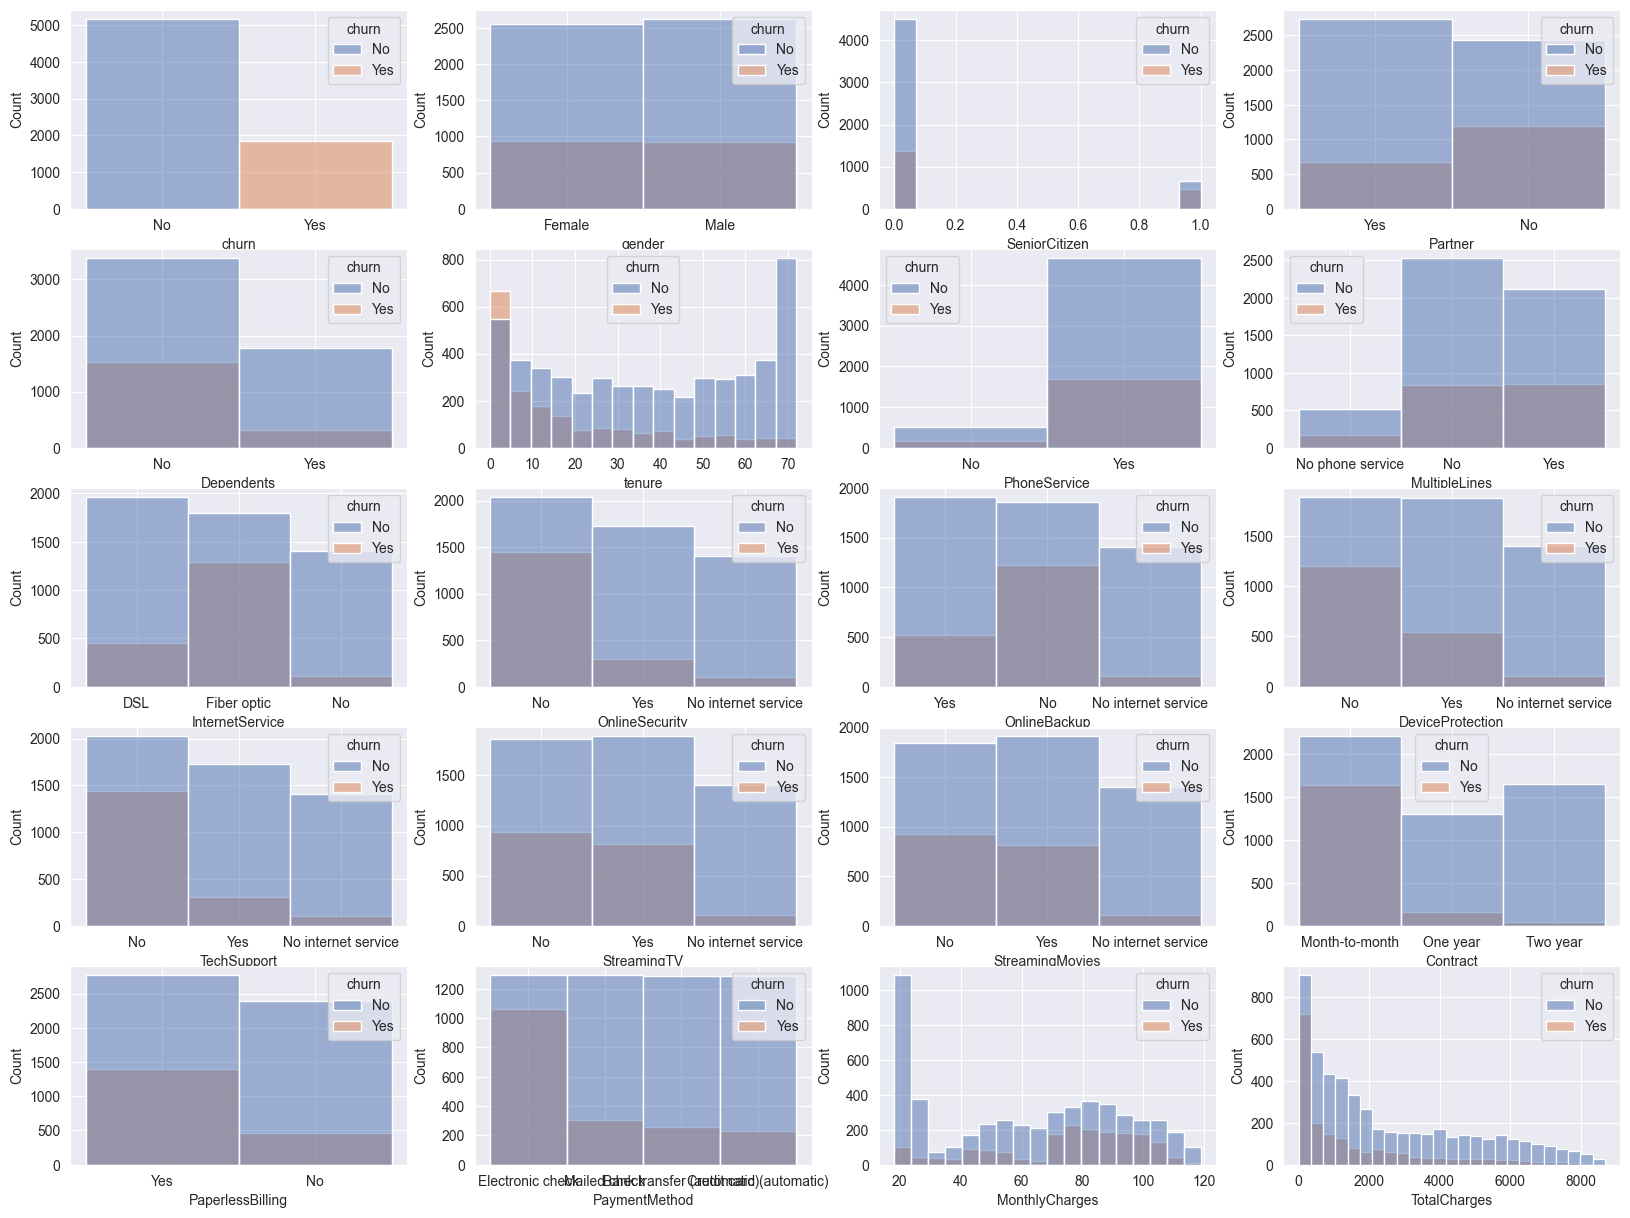

In [50]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20,15))
axs=axs.flat
for i in range(len(df.columns)):
    sns.histplot(data=df, x=df.columns[i],hue="churn", palette=churn_colors, ax=axs[i])

### 5.3- Converting Categorical Columns to Numeric Format

In [56]:
object_features = (df.select_dtypes(include=['object']).columns.tolist() + ["SeniorCitizen"])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print('Label Encoder Transformation')
for i in object_features :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))

Label Encoder Transformation
churn  :  [0 1]  =  ['No' 'Yes']
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
SeniorCitizen  :  [0 1]  =  [0 1]


### 5.4- Churn Analysis by Numerical Features, Customer, Services, and Payment Information

In [60]:
df_num =['tenure', 'MonthlyCharges', 'TotalCharges']
df_customer = ['gender','SeniorCitizen','Partner','Dependents'] 
df_services = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',  'OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport'] 
df_payment = ['Contract','PaperlessBilling','PaymentMethod'] 

### 5.4.1- Churn Analysis by Numerical Features

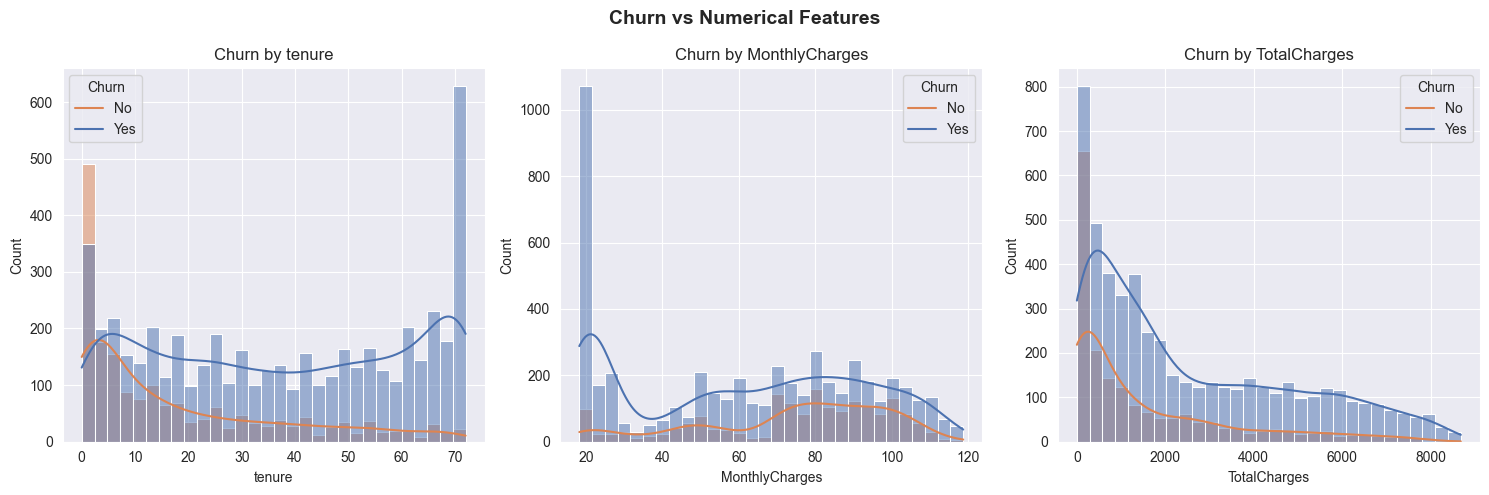

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, feature in zip(axes.flat, df_num):
    sns.histplot(data=df, x=feature, hue="churn", bins=30, kde=True, palette="deep", ax=ax)
    ax.set_title(f"Churn by {feature}", fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(title="Churn", labels=["No", "Yes"])
    
plt.suptitle("Churn vs Numerical Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### Customer Attributes and Churn Analysis

- **Churn = 1:**
  - **Tenure (Lower values):** Customers with a short tenure have a significantly higher churn rate.
  - **Monthly Charges (Higher values):** Customers with higher monthly charges tend to churn more.
  - **Total Charges (Lower values):** Customers with lower total charges are more likely to churn.
<p></p>

- **Churn = 0:**
  - **Tenure (Higher values):** Customers with long tenure are less likely to churn.
  - **Monthly Charges (Lower values):** Customers with lower monthly charges tend to stay.
  - **Total Charges (Higher values):** Customers with high total charges are more likely to stay.

### 5.4.2 - Churn by Customer Attributes

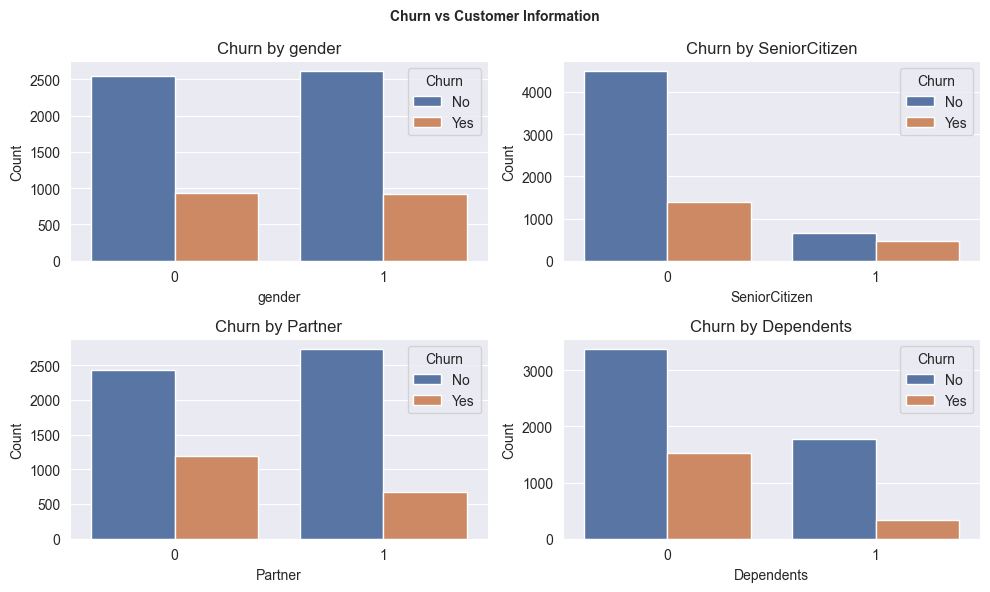

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.set_style("darkgrid")

for ax, feature in zip(axes.flat, df_customer):
    sns.countplot(data=df, x=feature, hue="churn", palette="deep", ax=ax)
    ax.set_title(f"Churn by {feature}", fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(title="Churn", labels=["No", "Yes"])

plt.suptitle("Churn vs Customer Information", fontsize=10, fontweight="bold")
plt.tight_layout()
plt.show()

### Churn vs Customer Information Analysis

- **Churn = 1:**
  - **SeniorCitizen = 1**: Older customers tend to have a higher churn rate.
  - **Partner = No**: Customers who do not have a partner are more likely to churn.
  - **Dependents = No**: Customers without dependents have a higher churn rate.
<p></p>
- **Churn = 0:**
  - **SeniorCitizen = 0**: Younger customers are more likely to stay.
  - **Partner = Yes**: Customers with a partner tend to have a lower churn rate.
  - **Dependents = Yes**: Customers with dependents are less likely to churn.

### 5.4.3 - Churn by Customer Services

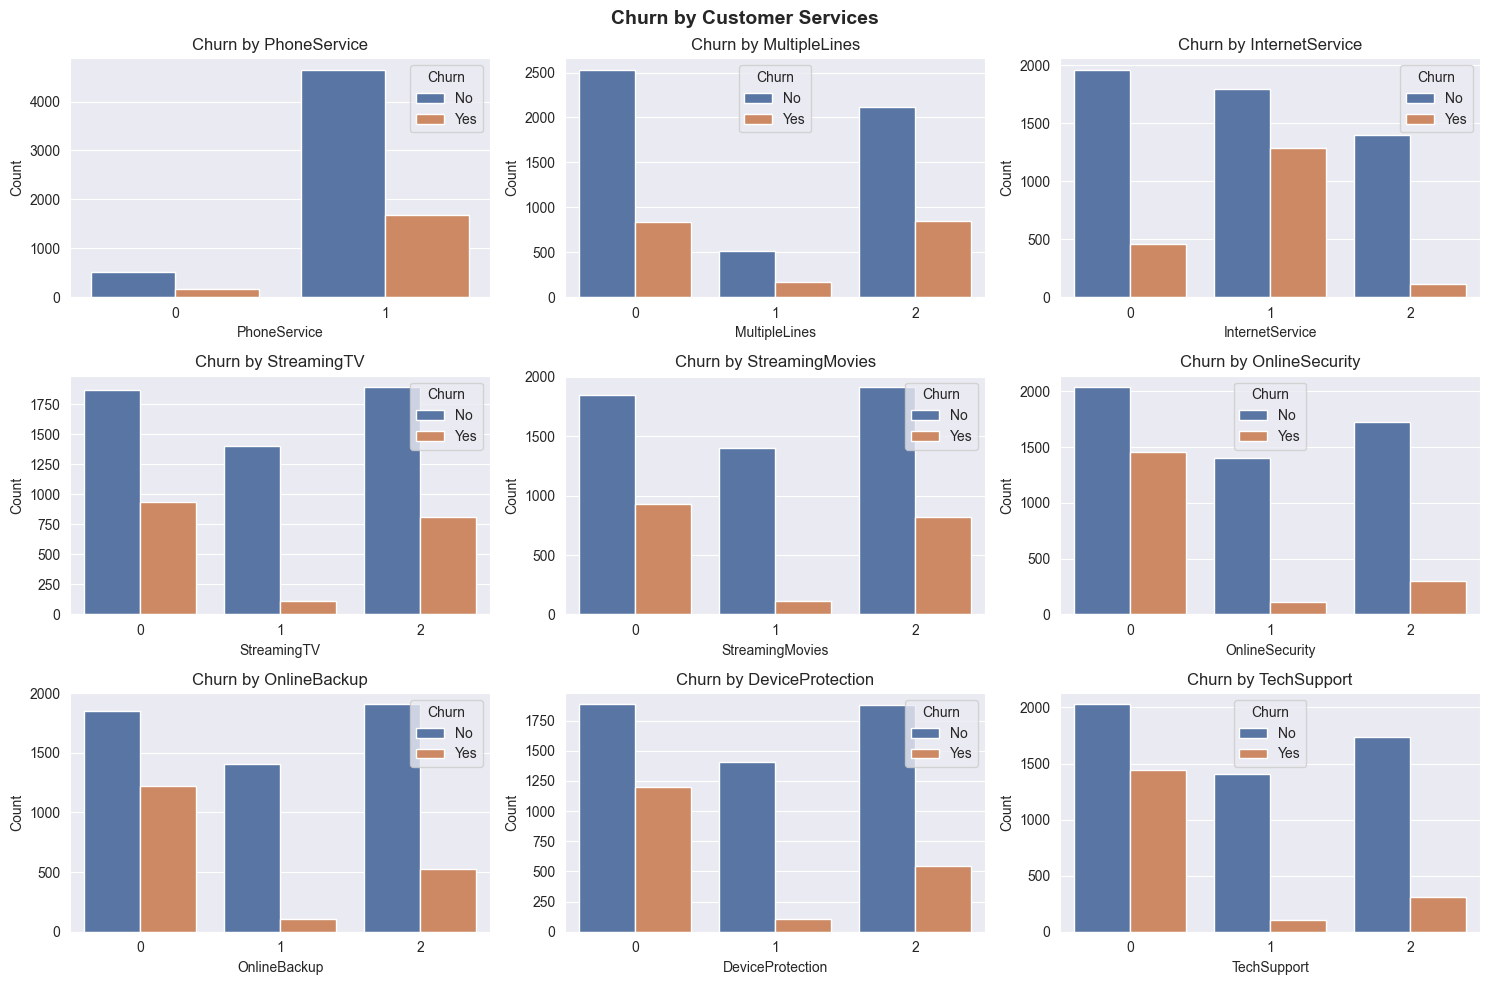

In [102]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.set_style("darkgrid")

for ax, feature in zip(axes.flat, df_services):
    sns.countplot(data=df, x=feature, hue="churn", palette="deep", ax=ax)
    ax.set_title(f"Churn by {feature}", fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(title="Churn", labels=["No", "Yes"])

plt.suptitle("Churn by Customer Services", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### Churn by Customer Services Analysis

- **Churn = 1:**
  - **InternetService = Fiber Optic**: Customers using fiber optic internet have a higher churn rate.
  - **OnlineSecurity = No**: Customers without online security are more likely to churn.
  - **DeviceProtection = No**: Lack of device protection is associated with a higher churn rate.
  - **TechSupport = No**: Customers without technical support tend to churn more.
  - **Contract = Month-to-month**: Month-to-month contract holders have significantly higher churn.
  - **PaymentMethod = Electronic check**: Customers who pay via electronic check tend to have a higher churn rate.
<p></p>
- **Churn = 0:**
  - **InternetService = DSL**: Customers using DSL internet have a lower churn rate.
  - **OnlineSecurity = Yes**: Having online security reduces the likelihood of churn.
  - **DeviceProtection = Yes**: Customers with device protection are more likely to stay.
  - **TechSupport = Yes**: Customers with technical support tend to remain longer.
  - **Contract = Two-year**: Customers with two-year contracts have the lowest churn rate.
  - **PaymentMethod = Bank transfer (automatic)**: Automatic bank transfers are associated with lower churn.

### 5.4.4 - Churn by Payment Information

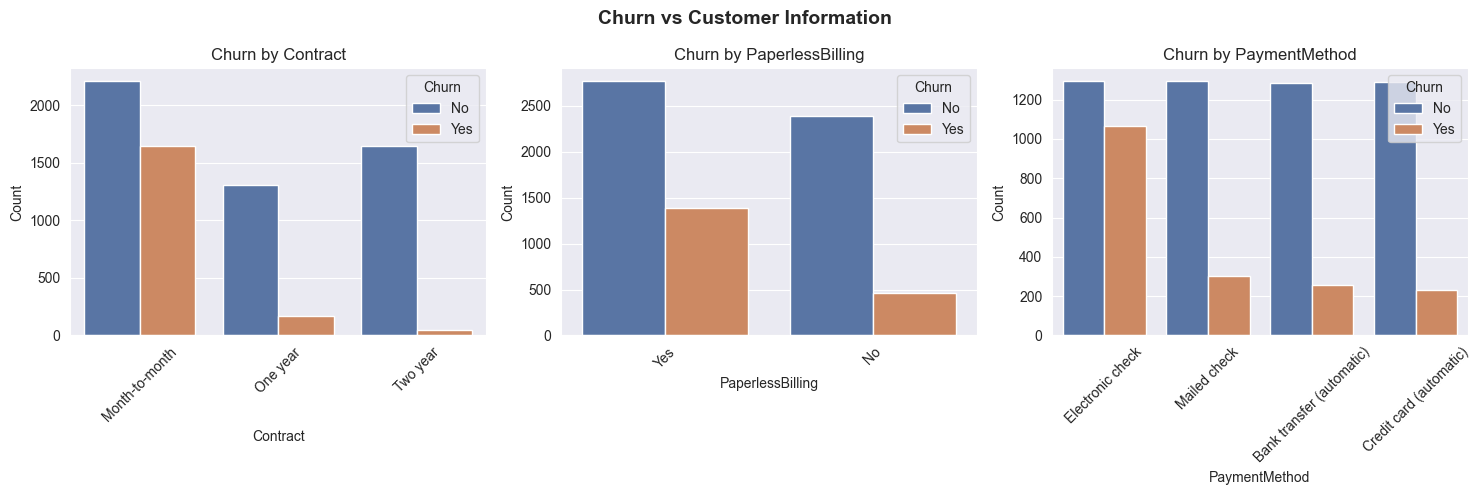

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.set_style("darkgrid")

for ax, feature in zip(axes.flat, df_payment):
    sns.countplot(data=df, x=feature, hue="churn", palette="deep", ax=ax)
    ax.set_title(f"Churn by {feature}", fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(title="Churn", labels=["No", "Yes"])
    ax.tick_params(axis='x', rotation=45)  

plt.suptitle("Churn vs Customer Information", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### Churn by Payment Information Analysis

- **Churn = 1:**
  - **Contract = Month-to-month**: Customers with month-to-month contracts have the highest churn rate.
  - **PaperlessBilling = Yes**: Customers using paperless billing are more likely to churn.
  - **PaymentMethod = Electronic check**: Customers who pay via electronic check have the highest churn rate.

- **Churn = 0:**
  - **Contract = Two-year**: Customers with two-year contracts have the lowest churn rate.
  - **PaperlessBilling = No**: Customers who do not use paperless billing tend to stay longer.
  - **PaymentMethod = Bank transfer (automatic) & Credit card (automatic)**: Customers who use automatic payment methods are less likely to churn.

## 5.5- Churn Correlation

### 5.5.1- Compute Correlation Statistics

In [139]:
churn = df[df['churn'] == 1].describe().T
non_churn = df[df['churn'] == 0].describe().T

df_churn = pd.DataFrame({"churn": churn["mean"], "non_churn": non_churn["mean"], "corr": df.corr()["churn"] }).reset_index()
df_churn.iloc[1:,:].round(2).sort_values(by="corr", ascending=False)

,index,churn,non_churn,corr
18,MonthlyCharges,74.60,61.34,0.19
16,PaperlessBilling,0.75,0.54,0.19
2,SeniorCitizen,0.26,0.13,0.15
17,PaymentMethod,1.76,1.50,0.11
7,MultipleLines,1.01,0.92,0.04
6,PhoneService,0.91,0.90,0.01
1,gender,0.50,0.51,-0.01
13,StreamingTV,0.94,1.00,-0.03
14,StreamingMovies,0.94,1.01,-0.04
8,InternetService,0.81,0.89,-0.05


### 5.5.2- Features with Low Correlation to Churn

In [161]:
low_corr = df_churn[df_churn["corr"].abs() < 0.05]
low_corr

,index,churn,non_churn,corr
1,gender,0.497038,0.506971,-0.008763
6,PhoneService,0.908454,0.900852,0.011323
7,MultipleLines,1.007001,0.920604,0.040175
8,InternetService,0.812601,0.891751,-0.047366
13,StreamingTV,0.935380,1.004841,-0.034591
14,StreamingMovies,0.939688,1.012974,-0.036492


### 5.5.3- Features with High Correlation to Churn

In [159]:
high_corr = df_churn[df_churn["corr"].abs() > 0.2].iloc[1:,:]
high_corr

,index,churn,non_churn,corr
5,tenure,18.088853,37.640782,-0.351508
9,OnlineSecurity,0.376414,0.939388,-0.288505
12,TechSupport,0.392569,0.943261,-0.281654
15,Contract,0.141088,0.890976,-0.396531


### 5.5.4- Correlation Plot

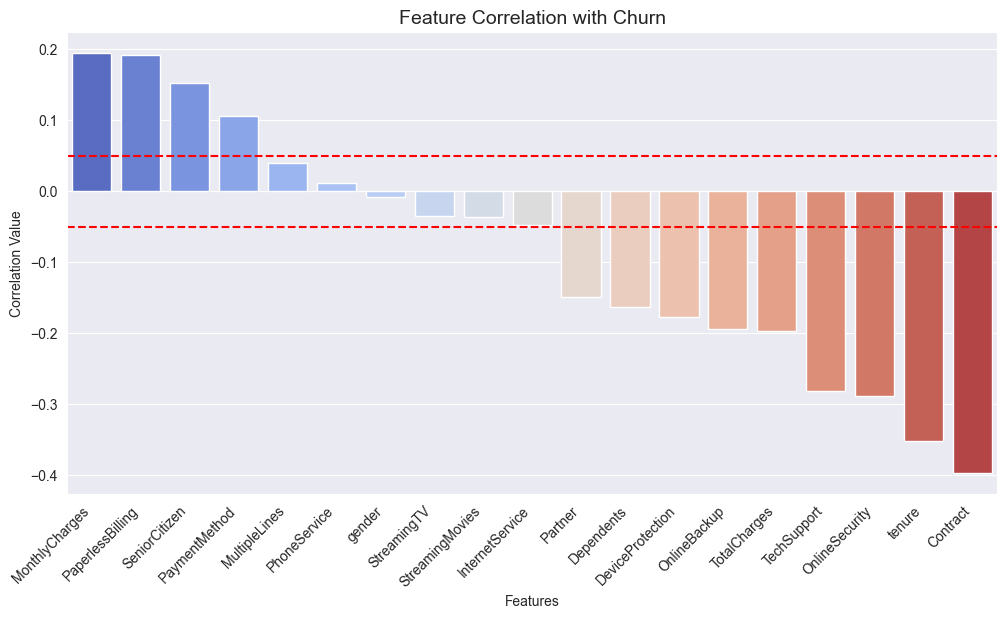

In [117]:
corr_plot = df_churn[["index", "corr"]].sort_values(by="corr", ascending=False).iloc[1:,:]


fig, ax = plt.subplots(figsize=(12, 6))

palette = sns.color_palette("coolwarm", len(corr_plot))

sns.barplot(
    data=corr_plot, x="index", y="corr", hue="index", dodge=False,  
    palette=sns.color_palette("coolwarm", len(corr_plot)), ax=ax)

ax.axhline(y=-0.05, color='red', linestyle='--', linewidth=1.5, label="Weak Correlation Threshold (-0.05)")
ax.axhline(y=0.05, color='red', linestyle='--', linewidth=1.5, label="Weak Correlation Threshold (0.05)")

ax.set_title("Feature Correlation with Churn", fontsize=14)
ax.set_ylabel("Correlation Value")
ax.set_xlabel("Features")
plt.xticks(rotation=45, ha='right')

plt.show()

### 5.5.5- Correlation matrix

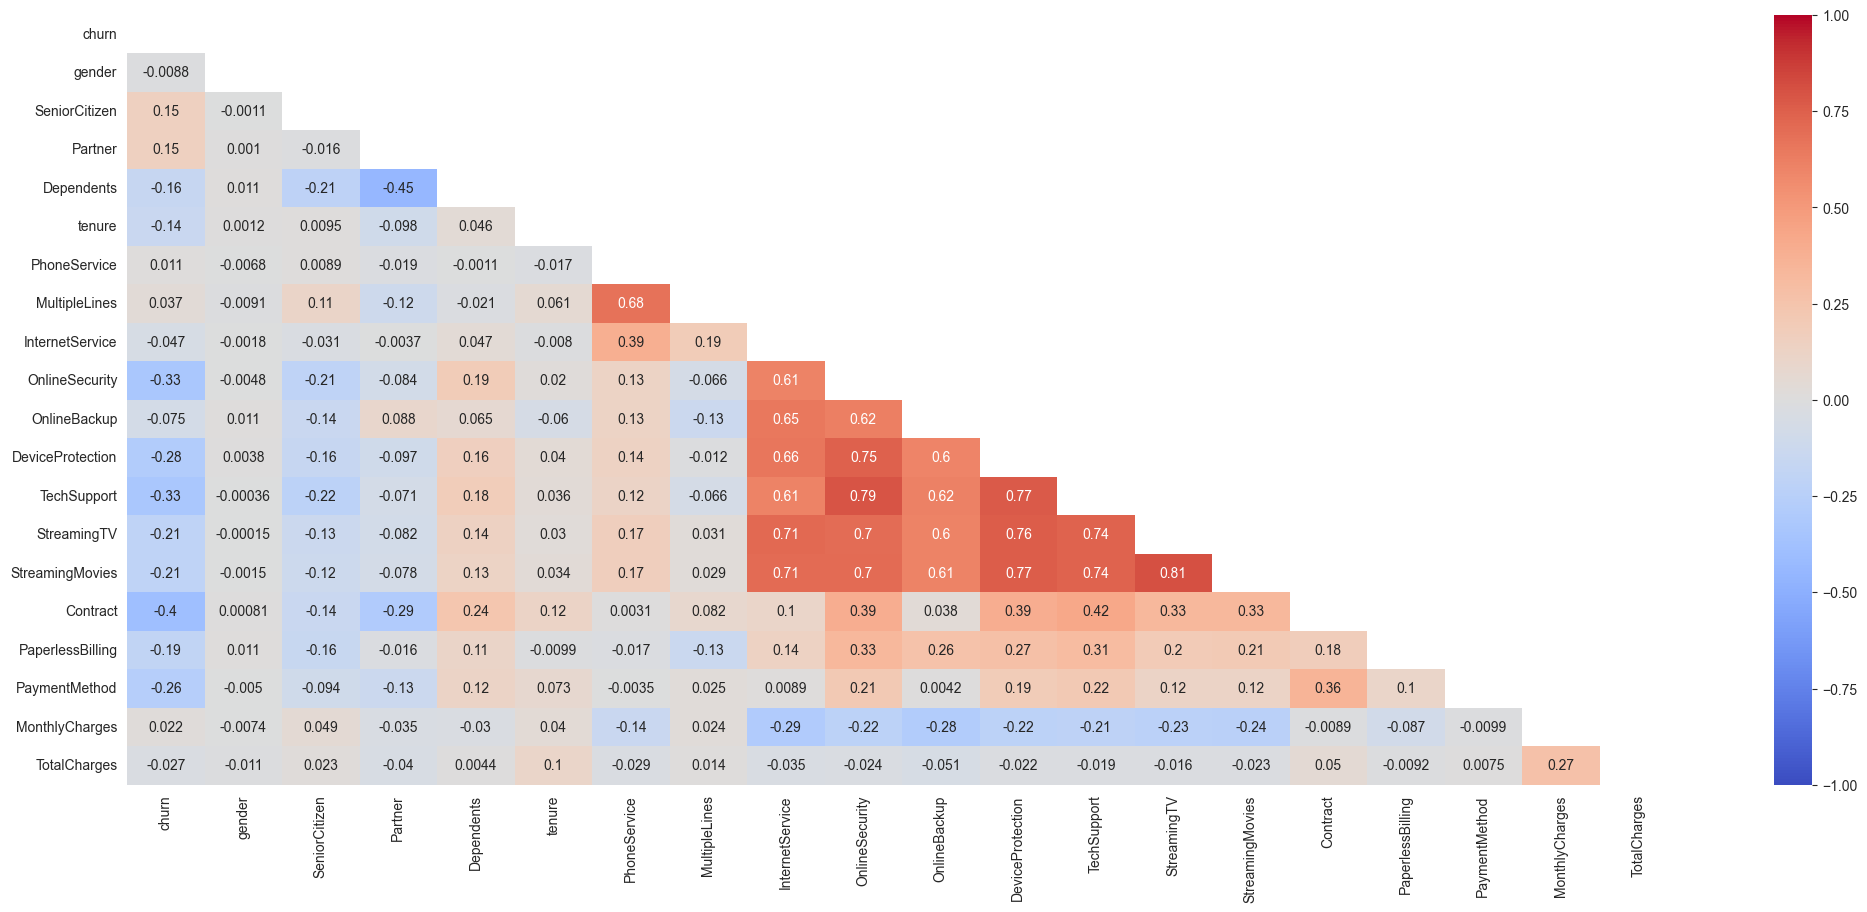

In [120]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns,
                     annot=True, linewidths=0, cmap="coolwarm", vmin=-1, vmax=1)

## 5.6- Summary Statistics

In [122]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T.round(2)  # Transposed for better readability

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.47,24.53,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.85,30.07,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2286.77,2266.86,0.00,403.35,1400.55,3801.7,8684.80


## 5.7- Outliers Analysis

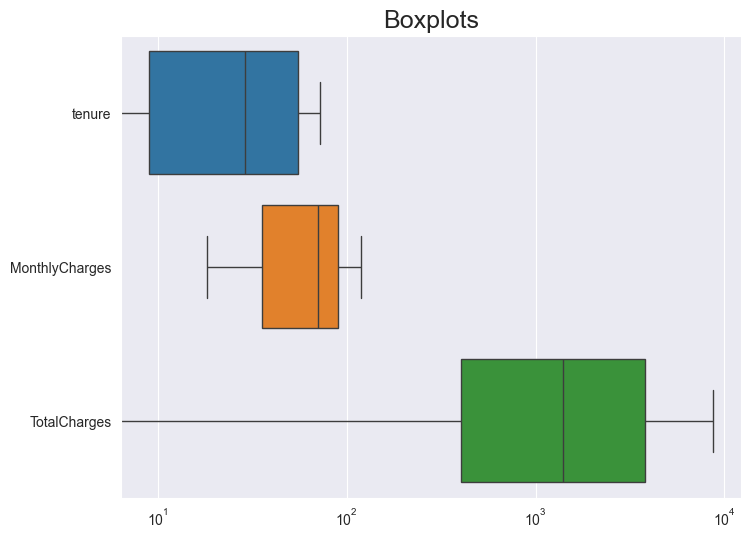

In [126]:
# Boxplot to identify outliers in numerical features
plt.figure(figsize = (8,6))
ax =sns.boxplot(data = df[['tenure', 'MonthlyCharges', 'TotalCharges']], orient="h")
ax.set_title('Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

### Outliers Analysis

Despite the boxplot not indicating the presence of significant outliers, we will conduct a more detailed analysis. This is particularly important for ensuring the accuracy and reliability of our findings, especially for the presentation of this portfolio. Identifying subtle anomalies can provide deeper insights and improve data-driven decision-making.

### 5.7.1- Quartiles and Outliers Analysis

In [135]:
def outliers_analysis(feature,feature_name,dataset):
    
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to churn cases: {}'.format(len(outliers)))
    print('-' * 65)
    
    return dataset
df_out = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
for col in df_out:
    new_df = outliers_analysis(df_out[col],str(col),df_out)

Quartile 25: 9.0 | Quartile 75: 55.0
iqr: 46.0
Cut Off: 69.0
tenure Lower: -60.0
tenure Upper: 124.0
tenure outliers for close to churn cases: 0
-----------------------------------------------------------------
Quartile 25: 35.75 | Quartile 75: 89.9
iqr: 54.150000000000006
Cut Off: 81.22500000000001
MonthlyCharges Lower: -45.47500000000001
MonthlyCharges Upper: 171.125
MonthlyCharges outliers for close to churn cases: 0
-----------------------------------------------------------------
Quartile 25: 403.35 | Quartile 75: 3801.7
iqr: 3398.35
Cut Off: 5097.525
TotalCharges Lower: -4694.174999999999
TotalCharges Upper: 8899.224999999999
TotalCharges outliers for close to churn cases: 0
-----------------------------------------------------------------


### 5.7.2- "TotalCharges" plot

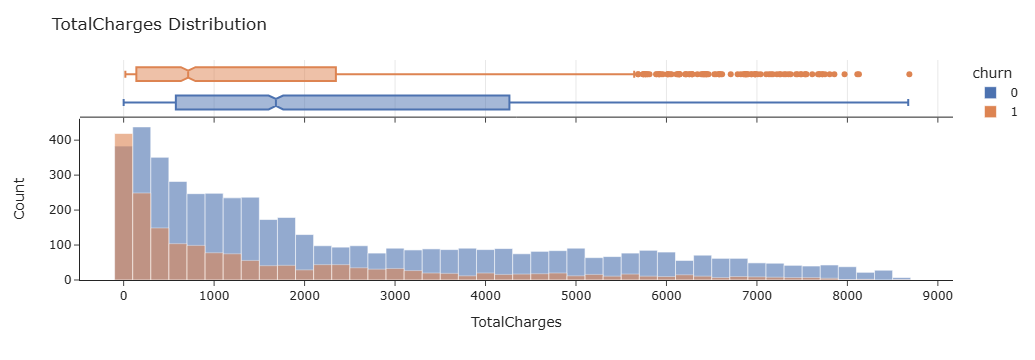

In [169]:
palette = sns.color_palette("deep")  
churn_colors2 = {0: to_hex(palette[0]), 1: to_hex(palette[1])}  
fig = px.histogram(df, x="TotalCharges", color="churn", color_discrete_map=churn_colors2,  barmode="overlay", opacity=0.6,  marginal="box"  )
# Adjusting the grid and background to match Seaborn's style
fig.update_layout(template="simple_white",  title="TotalCharges Distribution", xaxis_title="TotalCharges", yaxis_title="Count", showlegend=True )
fig.show()

### 5.7.3- "Total Charge"s Quantiles

In [135]:
var= "TotalCharges"
Q1 = df[var].quantile(0.25)  # First quartile (25%)
Q3 = df[var].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1                    # Interquartile range (IQR)
lower_whisker = max(0, Q1 - 1.5 * IQR)   # Lower whisker (boundary for non-outliers)
upper_whisker = Q3 + 1.5 * IQR           # Upper whisker (boundary for non-outliers)
price_null = df[var].isnull().sum()  # Count of missing values in "price"
median = df[var].median()

# Counting the number of units in each range
outliers_lower = len(df[df[var] < lower_whisker])  # Lower outliers
lower_whisker_units = len(df[(df[var] >= lower_whisker) & (df[var] < Q1)])  # Values between lower whisker and Q1
units_q1 = len(df[(df[var] >= Q1) & (df[var] < df[var].median())])  # Values between Q1 and median
units_median = len(df[df[var] == df[var].median()])  # Values equal to the median
units_q3 = len(df[(df[var] > df[var].median()) & (df[var] <= Q3)])  # Values between median and Q3
upper_whisker_units = len(df[(df[var] > Q3) & (df[var] <= upper_whisker)])  # Values between Q3 and upper whisker
outliers_upper = len(df[df[var] > upper_whisker])  # Upper outliers

# Creating a DataFrame with statistics and unit counts
quartile_df = pd.DataFrame({
    "Statistic": [
        "Lower Whisker", "Q1 (25%)", "Median (50%)", "Q3 (75%)", 
        "Upper Whisker", "Lower Outliers", "Upper Outliers", "Missing Values"
    ],
    "Age": [
        lower_whisker, Q1, median, Q3, 
        upper_whisker, "-", "-", "-"
    ],
    "Units": [
        lower_whisker_units, units_q1, units_median, units_q3, 
        upper_whisker_units, outliers_lower, outliers_upper, price_null
    ]
})

# Adding a cumulative sum column
quartile_df["Cumulative Sum"] = quartile_df["Units"].cumsum()
quartile_df

,Statistic,Age,Units,Cumulative Sum
0,Lower Whisker,0,1755,1755
1,Q1 (25%),403.35,1755,3510
2,Median (50%),1400.55,1,3511
3,Q3 (75%),3801.7,1755,5266
4,Upper Whisker,8899.225,1755,7021
5,Lower Outliers,-,0,7021
6,Upper Outliers,-,0,7021
7,Missing Values,-,0,7021


## 5.8- Visualization 

### 5.8.1- Pairplot of the 4 Most Correlated Features

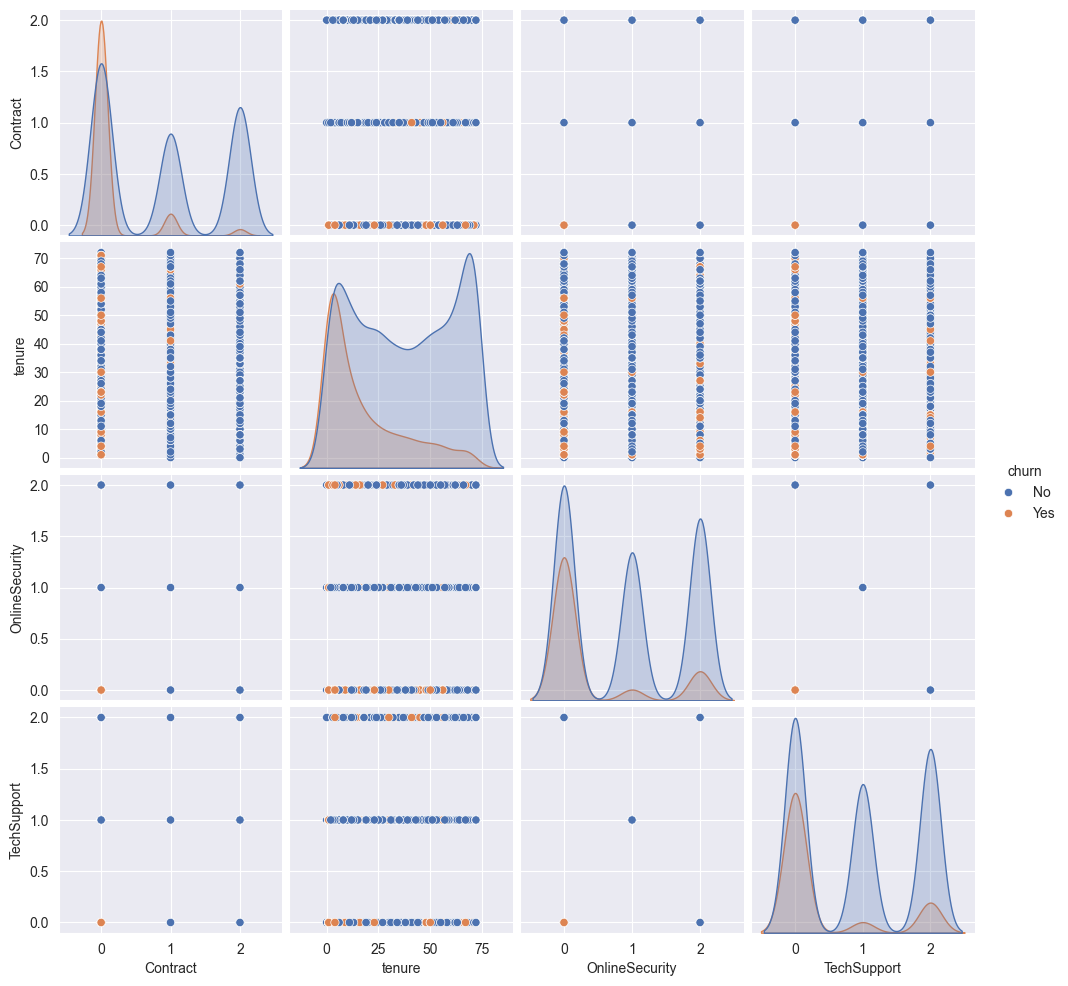

In [66]:
df_numeric = df.copy()

categorical_features = ["Contract", "tenure", "OnlineSecurity", "TechSupport"]
for col in categorical_features:
    df_numeric[col] = LabelEncoder().fit_transform(df[col])

sns.pairplot(df_numeric, vars=categorical_features, hue="churn", diag_kind="kde", palette=churn_colors)
plt.show()

### 📊 Analysis of the First Row in the Pairplot - Contract Feature

The first row of the pairplot visualizes the relationships between **Contract** and the other selected variables (`Contract`, `tenure`, `OnlineSecurity`, `TechSupport`), with churn (`0` = stayed, `1` = churned) highlighted.

**1- Contract vs. Contract**
- The diagonal plot shows the **distribution of contract types**:
  - **0 = Month-to-month**
  - **1 = One-year**
  - **2 = Two-year**
- Churned customers are **mostly in month-to-month contracts**.
- **One-year and two-year contracts have significantly lower churn**.

**2- Contract vs. Tenure**
- **Month-to-month contracts** have **a wide range of tenures**, but churn is **higher at lower tenures**.
- **One-year and two-year contracts** correspond to **longer tenures** and **lower churn**.
- This confirms that **longer contracts encourage customer retention**.

**3- Contract vs. OnlineSecurity**
- Most customers **without OnlineSecurity (`0`)** have **month-to-month contracts**.
- Churn is **higher** among these customers.
- **Customers with longer contracts** are **more likely to have OnlineSecurity (`1`)**, reducing churn.

**4- Contract vs. TechSupport**
- A similar trend to OnlineSecurity:
  - **Customers without TechSupport (`0`) on month-to-month contracts have higher churn**.
  - **One-year and two-year contract holders with TechSupport (`1`) tend to stay.**
- Offering TechSupport could help **reduce churn for short-term contracts**.

<div style="background-color:#E8E0D1; padding:15px; border-radius:5px">

# 5.9 - EDA Conclusion

Based on the Exploratory Data Analysis (EDA), several key insights and patterns about telecom customer churn have emerged clearly:

### 1. Customer Demographics and Churn Patterns

**Groups with Higher Churn (Churn = 1):**
- **Senior Citizens:** Customers categorized as senior citizens (SeniorCitizen = 1) have a notably higher churn rate.
- **Customers without Partners or Dependents:** Individuals lacking familial commitments such as a partner or dependents tend to churn more frequently.

**Groups with Lower Churn (Churn = 0):**
- **Younger Customers:** Non-senior customers demonstrate significantly lower churn rates.
- **Customers with Partners or Dependents:** Those with family responsibilities show greater customer loyalty.

### 2. Impact of Contract Type and Service Usage on Churn

**Groups with Higher Churn:**
- **Month-to-Month Contracts:** Customers without long-term contractual commitments exhibit higher churn rates.
- **Lack of Additional Services:** Customers who do not utilize added-value services like online security, device protection, or technical support are more prone to churn.
- **Fiber Optic Internet Users:** Customers using fiber optic internet service churn more frequently compared to those using DSL.

**Groups with Lower Churn:**
- **Two-Year Contracts:** Long-term contract customers demonstrate significantly lower churn.
- **Subscribers to Tech Support and Online Security Services:** Customers leveraging these specific services are less likely to churn.

### 3. Financial Factors and Tenure Related Trends

**Groups with Higher Churn:**
- **Customers with Short Tenure:** Customers who recently joined the telecom provider show a higher likelihood of leaving.
- **Customers with Higher Monthly Charges:** Those paying higher monthly rates exhibit increased churn.
- **Customers with Lower Total Charges:** Customers with lower overall spending history are more inclined to churn.

**Groups with Lower Churn:**
- **Customers with Long Tenure:** Individuals who have maintained long-term relationships are considerably more loyal.
- **Customers with Lower Monthly Charges:** Affordable monthly charges correlate with greater customer retention.
- **Customers with Higher Total Charges:** Higher cumulative expenditure is strongly associated with decreased churn rates.

### 4. Payment Method and Billing Preferences

- **Higher Churn with Electronic Checks:** Customers paying bills via electronic checks show the highest churn rates.
- **Lower Churn with Automatic Payment Methods:** Customers using automatic bank transfers or credit card payments tend to have significantly lower churn rates.


</div>